# Call graph evolution

Instructions: 

* Replace the proj_name and proj_datafolder in the Configuration section
* [optional] replace the cloud drive folder in the Configuration section 

## Configuration

In [ ]:
proj_name = 'PROJ_NAME'
proj_data_folder = './EXAMPLEFOLDER/'

GDRIVE_FOLDER = 'GDRIVE_FOLDER'

## [Optional] Cloud drive connection

In [ ]:
from google.colab import drive
 
drive.mount('/gdrive')
# the project's folder
%cd '/gdrive/My Drive/' + GDRIVE_FOLDER 

# Imports

In [2]:
import networkx as nx
import pandas as pd
import sqlite3
import os

In [4]:
# callgraphCA libraries
from network_analytics import *

# Database connections

In [5]:
ANALYTICS_DB_PATH =  proj_data_folder + proj_name + '_analytics.db'
os.path.exists(ANALYTICS_DB_PATH)
con_analytics_db = sqlite3.connect(ANALYTICS_DB_PATH)

In [6]:
RAW_CG_DB_PATH = proj_data_folder + proj_name + '_raw_cg.db'
os.path.exists(RAW_CG_DB_PATH)
con_graph_db = sqlite3.connect(RAW_CG_DB_PATH)

In [7]:
EDGE_HIST_DB_PATH = proj_data_folder + proj_name + '_cg_hist.db'
print(os.path.exists(EDGE_HIST_DB_PATH))
con_edge_hist = sqlite3.connect(EDGE_HIST_DB_PATH)

True


# CG Evolution


In [8]:
sql_statement = """SELECT * FROM git_commit order by commit_commiter_datetime;"""

git_commit_df = pd.read_sql_query(sql_statement, con_analytics_db)

In [9]:
len(git_commit_df)

585

In [10]:
git_commit_df.head(2)

,commit_hash,commit_commiter_datetime,author,in_main_branch,merge,nr_modified_files,nr_deletions,nr_insertions,nr_lines
0,c0bc9d2f5f646a11383ca567a4c83c8ee582cef0,2015-08-04 21:57:23+02:00,Paolo Rotolo,True,False,24,0,461,461
1,c77f26bbcfa477c2dc1739b7f74c24e883914bf7,2015-08-10 11:30:50+02:00,Paolo Rotolo,True,False,6,2,67,69


In [11]:
git_commit_df.iloc[0]['commit_hash']

'c0bc9d2f5f646a11383ca567a4c83c8ee582cef0'

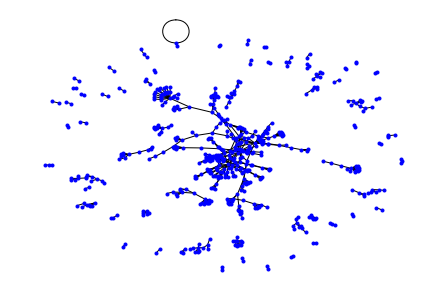

G:  DiGraph with 571 nodes and 628 edges
NetworkValues. Diameter: 5, nrCC: 67, DD nr degrees: 22, maxDegree:21, nrNodesLCC: 291
LCC:  DiGraph with 291 nodes and 397 edges


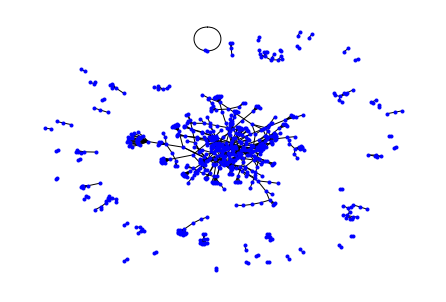

G:  DiGraph with 676 nodes and 813 edges
NetworkValues. Diameter: 6, nrCC: 58, DD nr degrees: 23, maxDegree:22, nrNodesLCC: 416
LCC:  DiGraph with 416 nodes and 592 edges


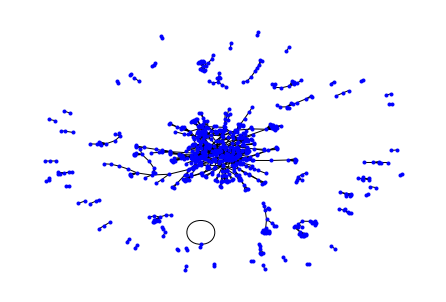

G:  DiGraph with 710 nodes and 854 edges
NetworkValues. Diameter: 6, nrCC: 60, DD nr degrees: 24, maxDegree:23, nrNodesLCC: 437
LCC:  DiGraph with 437 nodes and 623 edges


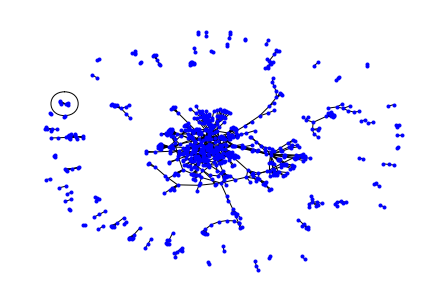

G:  DiGraph with 808 nodes and 985 edges
NetworkValues. Diameter: 5, nrCC: 65, DD nr degrees: 25, maxDegree:24, nrNodesLCC: 550
LCC:  DiGraph with 550 nodes and 774 edges


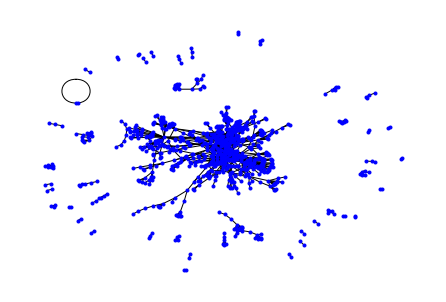

G:  DiGraph with 881 nodes and 1219 edges
NetworkValues. Diameter: 5, nrCC: 47, DD nr degrees: 31, maxDegree:30, nrNodesLCC: 684
LCC:  DiGraph with 684 nodes and 1051 edges


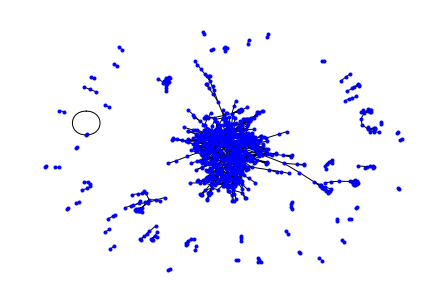

G:  DiGraph with 975 nodes and 1525 edges
NetworkValues. Diameter: 6, nrCC: 53, DD nr degrees: 30, maxDegree:29, nrNodesLCC: 742
LCC:  DiGraph with 742 nodes and 1316 edges


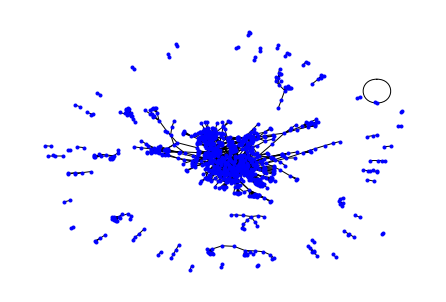

G:  DiGraph with 988 nodes and 1536 edges
NetworkValues. Diameter: 6, nrCC: 51, DD nr degrees: 32, maxDegree:31, nrNodesLCC: 757
LCC:  DiGraph with 757 nodes and 1327 edges


In [13]:
row_idx_list = [1, 100, 200, 300, 400, 500, 582]
for i in row_idx_list:
  sql_statement = """SELECT * FROM '{0}';""".format(git_commit_df.iloc[i]['commit_hash'])
  cg_at_hash = pd.read_sql_query(sql_statement, con_graph_db)

  G=nx.from_pandas_edgelist(cg_at_hash,'source_node_id',	'target_node_id', create_using=nx.DiGraph() )
  nv, lcc = getNetworkValues(G, drawGraph = True)
